In [1]:
import numpy as np                   # Numerical computation library
import pandas as pa                  # Dataframe and Data manipulation Library
import matplotlib.pyplot as plt      # Basic plotting functionality Library
import seaborn as sn                 # Advanced Data visualization Library
import numpy.random as rn
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor # Import the Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
import matplotlib.colors as pltco # A package to help with coloring plots
#[x for x in dir(list) if not '__' in x]

### Import Data Frame assign the name fifa
* Print out the head() or first 5 rows

In [2]:
fifa = pa.read_csv('https://www.dropbox.com/s/ov362sryogd0942/CompleteDataset.csv?dl=1', low_memory=False)

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,Aggression,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Position
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,89,63,...,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,92,48,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,94,56,...,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,88,78,...,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,58,29,...,55,25,11,61,44,10,83,70,11,GK


### Fixing Bad Data
* Stripped "€" and "K" from Wage
* Stripped "+" and "-" from the front of the columns
* Removed any part of the String after "+" and "-" and convert columns to float

In [3]:
fifa['Wage'] = fifa['Wage'].map(lambda x: x.lstrip('€').rstrip('K'))

In [4]:
A = fifa["Age"] = fifa.Age.astype(float)
B = fifa["Overall"] = fifa.Overall.astype(float)
C = fifa["Wage"] = fifa.Wage.astype(float)
D = fifa["Potential"] = fifa.Potential.astype(float)

In [5]:
def removeStrings (X):
    if '+' in X:
        K = X.find('+')
        return X[:K]
    if '-' in X:
        K = X.find('-')
        return X[:K]
    else:  
        return X

In [6]:
def convertFloat(fifa, feature):
    for K in fifa.index: 
        fifa.loc[K,feature] = removeStrings(fifa.loc[K, feature])

    
    fifa.loc[:, feature] = fifa.loc[:,feature].astype("float")  
    return fifa

In [7]:
fifa = convertFloat(fifa, "Acceleration")
fifa = convertFloat(fifa, "Aggression")
fifa = convertFloat(fifa, "Agility")
fifa = convertFloat(fifa, "Balance")
fifa = convertFloat(fifa, "Ball control")

### Avalaible Columns
* Age, Overall, Potentail, Wage, Acceleration, Aggression, Agility, Balance, and Ball Control

### K- nearest neighbors

In [8]:
X = np.array(fifa[['Ball control', 'Overall']])
y = np.array(fifa.iloc[:, 7])

In [9]:
for l in range(X.shape[1]):
    X[:, l] = ( X[:, l] - min(X[:, l]))/(max(X[:, l]) - min(X[:, l]))

In [10]:
 # Make the training and testing sets
n = X.shape[0]
test = int(0.30*n)            # We will use a test set made up of 30% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

In [11]:
from sklearn.neighbors import KNeighborsRegressor # Import the Regressor

In [12]:
# A bit of code for plotting the contour in a regression problem with two predictors
# Also prints out the training and testing errors

def plot_reg_model(reg, X_train, y_train, X_test, y_test):
    
    h = 0.01 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = -0.1, 1.1
    y_min, y_max = -0.1, 1.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))

Training R2: 0.6697406219027424
Testing R2: 0.6544529092515177


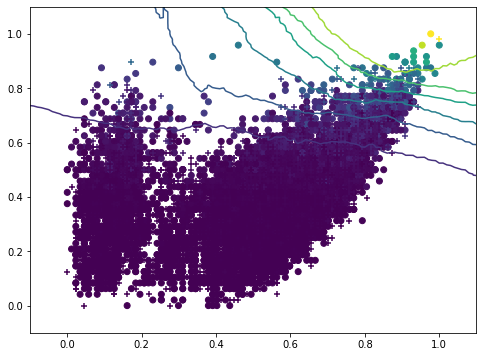

In [13]:
reg = KNeighborsRegressor(n_neighbors=100)
reg.fit(X_train, y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)

In [14]:
X = np.array(fifa[['Ball control', 'Agility']])
y = np.array(fifa.iloc[:, 3])

In [15]:
for l in range(X.shape[1]):
    X[:, l] = ( X[:, l] - min(X[:, l]))/(max(X[:, l]) - min(X[:, l]))

In [16]:
 # Make the training and testing sets
n = X.shape[0]
test = int(0.30*n)            # We will use a test set made up of 30% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

Training R2: 0.546920712142688
Testing R2: 0.49674727069535585


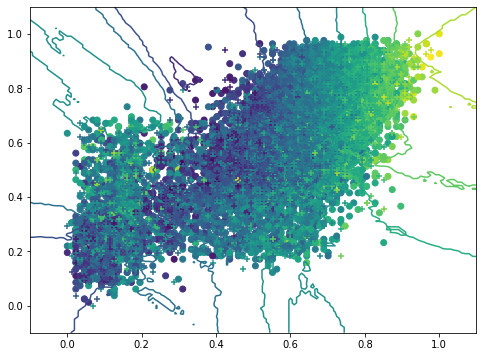

In [17]:
reg = KNeighborsRegressor(n_neighbors=25)
reg.fit(X_train, y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)

### PCA Model
* PCA Model with colums 7,8,9 vs Age

In [20]:
# Build a matrix of the predictors and results
X = np.array(fifa.iloc[:,7:10])
y = np.array(fifa.iloc[:, 1])

# We shuffle the data using a random permutation
import numpy.random as rn
n = X.shape[0]
test = int(0.25*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
Xpca= Xpca[perm]
y = y[perm]
X_test = Xpca[:test]       # Then create the test
y_test = y[:test]
X_train = Xpca[test:]     # and train sets
y_train = y[test:]

pca = PCA(n_components=2) # Use PCA to identify the two most important components

# component here means a linear combination of the features

Xpca = pca.fit_transform(X);

NameError: name 'Xpca' is not defined

In [22]:
cat1 = LogisticRegression(solver='liblinear', multi_class='auto').fit(X_train[:, 0:2], y_train)
cat1.score(X_train[:, 0:2], y_train), cat1.score(X_test[:, 0:2], y_test)

(0.0691189322316676, 0.06470152020763811)

In [23]:
def plot_reg_model(reg, X_train, y_train, X_test, y_test):

    h = 0.01 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = -40.0, 40.0
    y_min, y_max = -20.0, 20.0
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))

Training R2: 0.20853545992924438
Testing R2: 0.21200553425367397


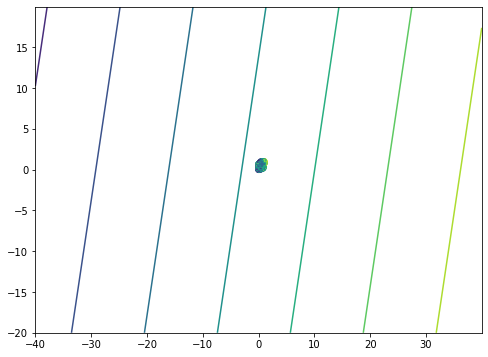

In [24]:
reg = LinearRegression()
reg.fit(X_train,y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)

* PCA Model With Columns 10,11,12 vs Age

In [25]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.colors as pltco # A package to help with coloring plots
# Build a matrix of the predictors and results
X = np.array(fifa.iloc[:,10:13])                        
y = np.array(fifa.iloc[:, 1])

# We shuffle the data using a random permutation
import numpy.random as rn
n = X.shape[0]
test = int(0.25*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
Xpca= Xpca[perm]
y = y[perm]
X_test = Xpca[:test]       # Then create the test
y_test = y[:test]
X_train = Xpca[test:]     # and train sets
y_train = y[test:]

pca = PCA(n_components=2) # Use PCA to identify the two most important components

# component here means a linear combination of the features

Xpca = pca.fit_transform(X);

NameError: name 'Xpca' is not defined

In [26]:
cat1 = LogisticRegression(solver='liblinear', multi_class='auto').fit(X_train[:, 0:2], y_train)
cat1.score(X_train[:, 0:2], y_train), cat1.score(X_test[:, 0:2], y_test)

(0.0691189322316676, 0.06470152020763811)

Training R2: 0.20853545992924438
Testing R2: 0.21200553425367397


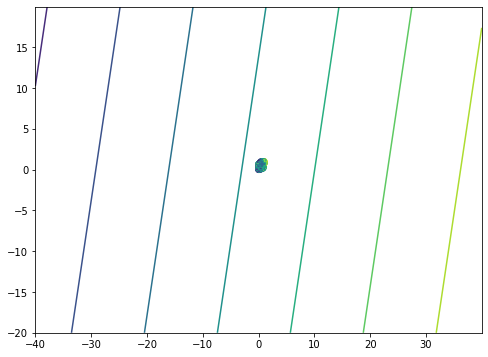

In [27]:
reg = LinearRegression()
reg.fit(X_train,y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)

### Regression Models Liner, Ridge, and Lasso

In [28]:
X = np.array(fifa[['Age', 'Overall']])
y = np.array(fifa['Wage'])

In [29]:
# A bit of code for plotting the contour in a regression problem with two predictors
# Also prints out the training and testing errors
import numpy.random as rn
def plot_reg_model(reg, X, y):

    # We shuffle the data using a random permutation

    n = X.shape[0]
    test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]       # Then create the test
    y_test = y[:test]
    X_train = X[test:]     # and train sets
    y_train = y[test:]
    
    reg.fit(X_train, y_train) # Fit the model
     
    nn = 200
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nn),   # Changed the function to use linspace rather than arrange
        np.linspace(y_min, y_max, nn))                    # This keeps us from having to adjust h.
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()]) # predict

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))
    
    return reg

Training R2: 0.3730767481848606
Testing R2: 0.36671612055704395


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

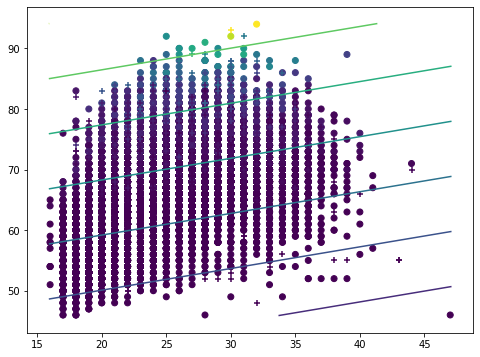

In [30]:
reg = LinearRegression()
plot_reg_model(reg, X, y)

In [31]:
from sklearn.linear_model import Ridge

Training R2: 0.3754000799782705
Testing R2: 0.35915276621530057


Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

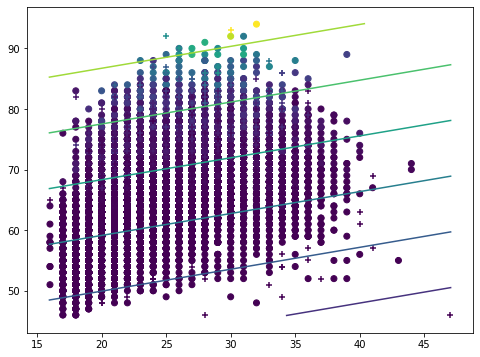

In [32]:
reg = Ridge(alpha=2)
plot_reg_model(reg, X, y)

In [33]:
from sklearn.linear_model import Lasso

Training R2: 0.3810114219824001
Testing R2: 0.34186783498810525


Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

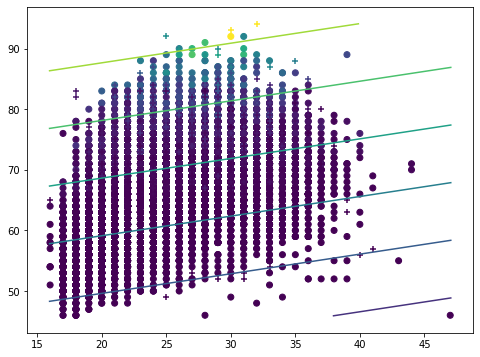

In [34]:
reg=Lasso(alpha=1)
plot_reg_model(reg, X, y)

In [35]:
from sklearn.neighbors import KNeighborsRegressor

Training R2: 0.762655298487854
Testing R2: 0.7377476737210467


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

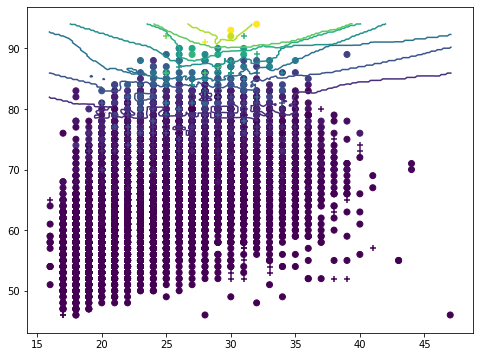

In [36]:
knn = KNeighborsRegressor(n_neighbors=10)
plot_reg_model(knn, X, y)

In [37]:
from sklearn.tree import DecisionTreeRegressor

Training R2: 0.7824935129879538
Testing R2: 0.6869537755788839


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

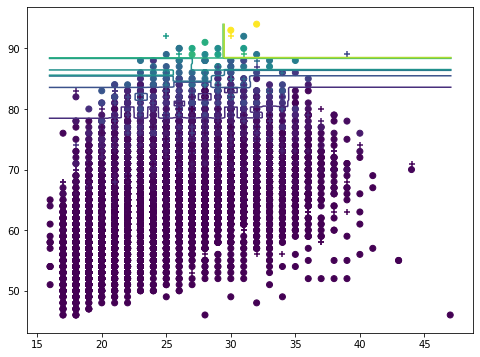

In [38]:
tree = DecisionTreeRegressor(min_samples_leaf=5)
plot_reg_model(tree, X, y)

### Nueral Networks

In [39]:
X = np.array(fifa[['Agility', 'Overall']])
y = np.array(fifa['Wage'])

In [40]:
# A bit of code for plotting the contour in a regression problem with two predictors
# Also prints out the training and testing errors

def plot_reg_model(reg, X, y):

    # We shuffle the data using a random permutation

    n = X.shape[0]
    test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]       # Then create the test
    y_test = y[:test]
    X_train = X[test:]     # and train sets
    y_train = y[test:]
    
    reg.fit(X_train, y_train) # Fit the model
     
    nn = 200
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nn),   # Changed the function to use linspace rather than arrange
        np.linspace(y_min, y_max, nn))                    # This keeps us from having to adjust h.
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()]) # predict

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))
    
    return reg

### Nueral Network Ridge Regression

Training R2: 0.3568538013297735
Testing R2: 0.3370827456804688


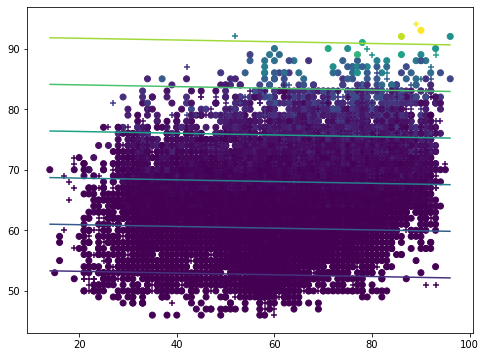

In [41]:
reg = Ridge(alpha=2)
plot_reg_model(reg, X, y);
plt.savefig('15.2.png')

### Nueral Network Lasso Regression

Training R2: 0.3503555995644938
Testing R2: 0.36309292091177625


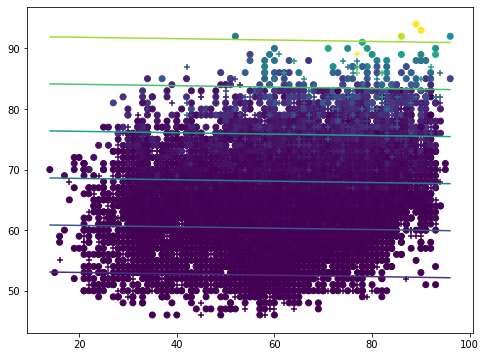

In [42]:
reg=Lasso(alpha=1)
plot_reg_model(reg, X, y);
plt.savefig('15.3.png')

### Nueral Network K-nearest Neighbors Regression

Training R2: 0.782152104340269
Testing R2: 0.7203983860254856


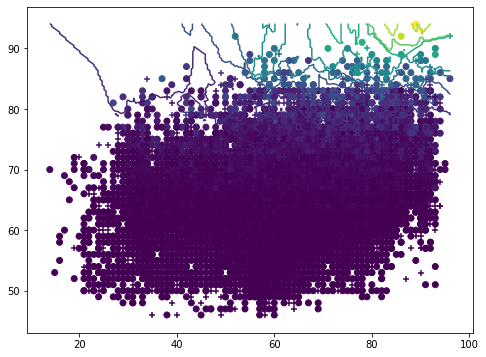

In [43]:
knn = KNeighborsRegressor(n_neighbors=6)
plot_reg_model(knn, X, y);
plt.savefig('15.4.png')

### Nueral Network Decision Tree Regression

Training R2: 0.818933263488925
Testing R2: 0.7384865705407719


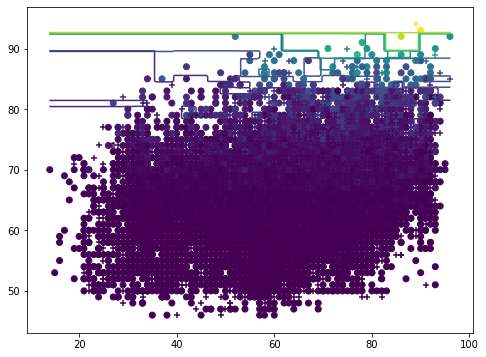

In [44]:
tree = DecisionTreeRegressor(max_depth=10)
plot_reg_model(tree, X, y);

### Ensemble Methods

Training R2: 0.7385273539517072
Testing R2: 0.7431597887478857


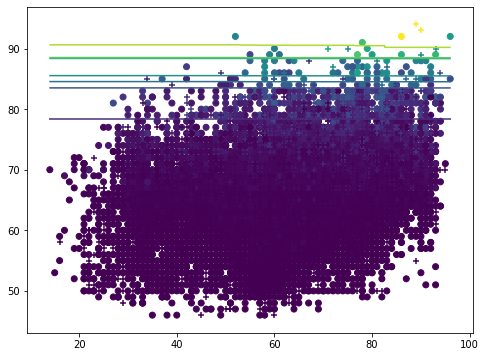

In [45]:
forest = RandomForestRegressor(n_estimators=100, max_depth=3, n_jobs=-1)
plot_reg_model(forest, X, y);
plt.savefig('15.6.png')

### Gradient Boosting Esamble Network Model

Training R2: 0.8040704581253688
Testing R2: 0.7735884630504263


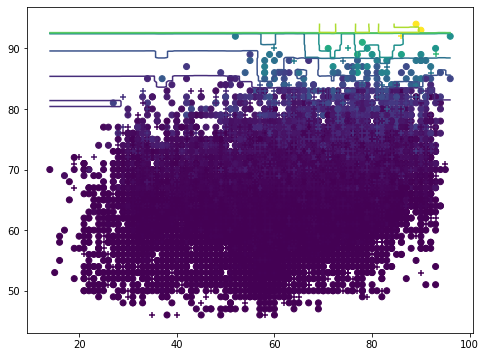

In [46]:
boost = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=5)
plot_reg_model(boost, X, y);
plt.savefig('15.7.png')

### Nueral Networks for Regression

In [47]:
X = np.array(fifa[['Age', 'Overall']])
y = np.array(fifa['Wage'])

In [48]:
v = [0]*X.shape[1]
for k in range(X.shape[1]):
    M = X[:, k].max()
    m = X[:, k].min()
    v[k] = (X[:, k] - m)/(M - m)
Xn = np.c_[v].transpose()   # Note I could not assign these to X because the type was int not float

Training R2: 0.7564231824219697
Testing R2: 0.7396975482390373


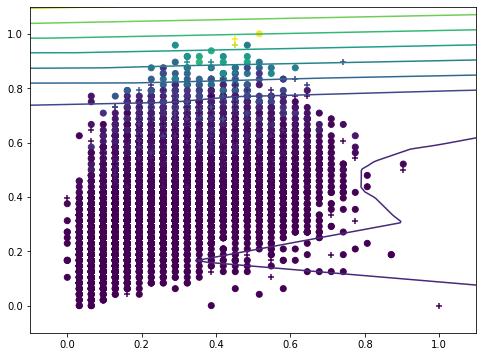

In [49]:
mlp = MLPRegressor(hidden_layer_sizes = (100), solver = 'lbfgs', activation = 'relu', alpha=0.0001)
plot_reg_model(mlp, Xn, y);
plt.savefig('15.8.png')

* adding an addtional layer to improve performance

Training R2: 0.7400288958963781
Testing R2: 0.7862352386085566


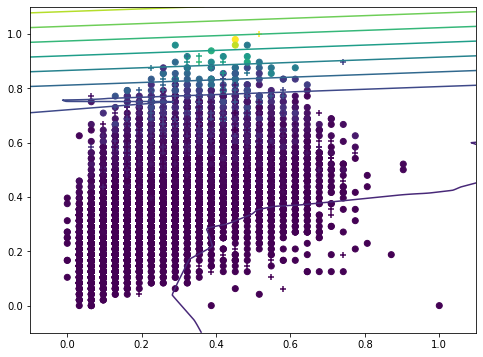

In [50]:
mlp = MLPRegressor(hidden_layer_sizes = (100, 100), solver = 'lbfgs', activation = 'relu', alpha=0.0001)
plot_reg_model(mlp, Xn, y);
plt.savefig('15.9.png')

### Decision Tree

In [51]:
X = np.array(fifa[['Overall', 'Wage']])
y = np.array(fifa['Age'])

In [52]:
import numpy.random as rn

In [53]:
# A bit of code for plotting the contour in a regression problem with two predictors
# Also prints out the training and testing errors

def plot_reg_model(reg, X, y):

    # We shuffle the data using a random permutation

    n = X.shape[0]
    test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]       # Then create the test
    y_test = y[:test]
    X_train = X[test:]     # and train sets
    y_train = y[test:]
    
    reg.fit(X_train, y_train) # Fit the model
     
    nn = 200
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nn),   # Changed the function to use linspace rather than arrange
        np.linspace(y_min, y_max, nn))                    # This keeps us from having to adjust h.
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()]) # predict

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))
    
    return reg

In [54]:
from sklearn.linear_model import LinearRegression

Training R2: 0.23427208731902593
Testing R2: 0.2357302441174911


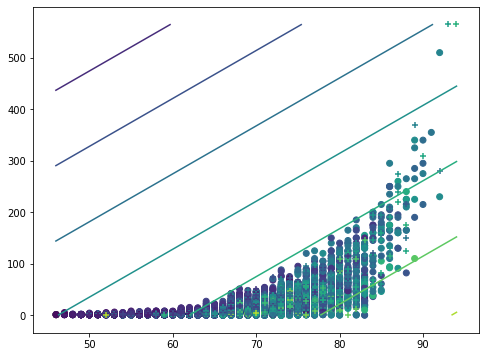

In [55]:
reg = LinearRegression()
plot_reg_model(reg, X, y)
plt.savefig('14.1.png')

plt.show()

In [56]:
from sklearn.neighbors import KNeighborsRegressor

Training R2: 0.2189326798380129
Testing R2: 0.16064888649043685


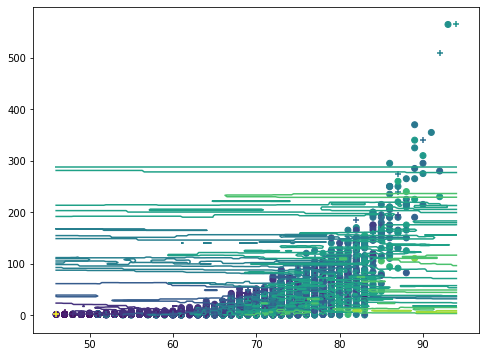

In [57]:
knn = KNeighborsRegressor(n_neighbors=6)
plot_reg_model(knn, X, y);
plt.savefig('14.4.png')
plt.show()

In [58]:
from sklearn.tree import DecisionTreeRegressor

Training R2: 0.31097826303563647
Testing R2: 0.2426433343496185


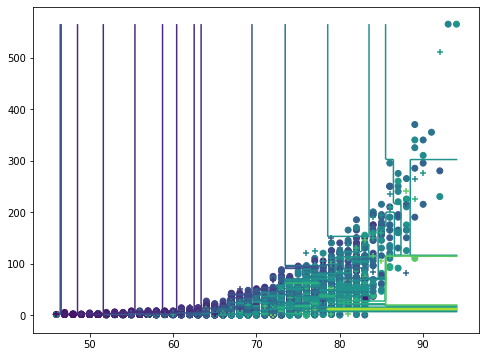

In [59]:
tree = DecisionTreeRegressor(min_samples_leaf=5)
plot_reg_model(tree, X, y);
plt.savefig('14.5.png')
plt.show()

In [60]:
from sklearn.tree import export_graphviz
import graphviz

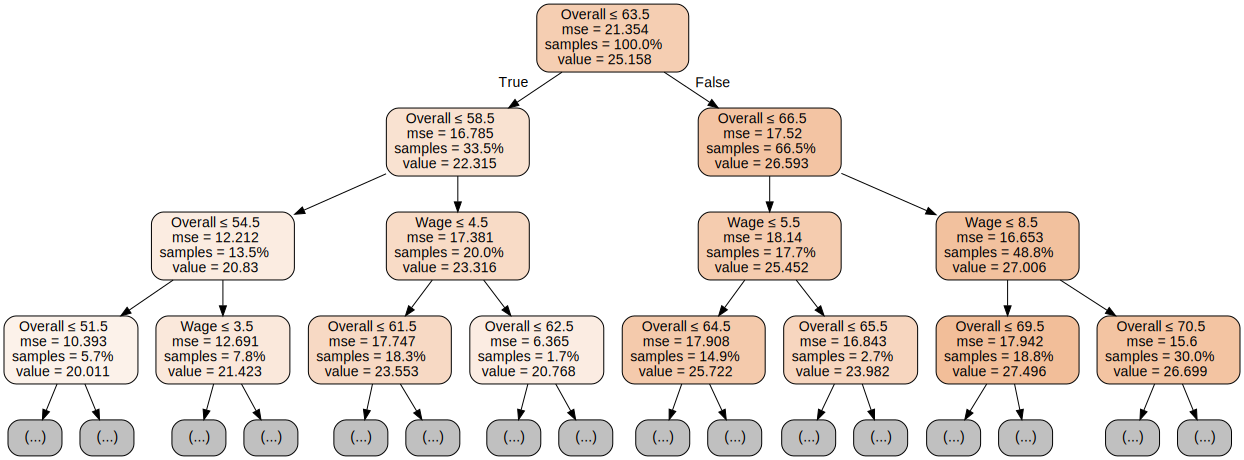

In [97]:

export_graphviz(tree, out_file='tree-1.dot', feature_names=['Overall', 'Wage'], rounded=True, filled=True,
                    special_characters=True, max_depth=3, proportion=True, precision=3,  leaves_parallel=False)

with open('tree-1.dot') as f:
    dot_graph = f.read()



display( graphviz.Source(dot_graph) )
